In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

from xgboost import XGBRegressor

from feature_engineering import FeatureTransformerLocationNaive

## Zheng's location naive feature engineering

In [2]:
df_train = pd.read_csv("data/train.csv")

feature_transformer = FeatureTransformerLocationNaive(df_train)
X = feature_transformer.get_X()
y = feature_transformer.get_y()

print(X.shape, y.shape)
print(feature_transformer.final_columns)

(431713, 8) (431713,)
['year', 'mth', 'num_rooms', 'is_executive', 'is_multi_gen', 'storey_level', 'lease_commence_date', 'floor_area_sqm']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Linear regression
print("*** Linear regression:")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

### Random Forest
print("*** Random Forest:")
rfr = RandomForestRegressor(n_estimators=100, max_depth=10)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

### Gradient Boosting
print("*** Gradient boosting:")
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

### XGBoosting
print("*** XG boosting:")
# I was told this is a regressor popular in industry...
xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

*** Linear regression:
MSE: 5121950388.26, r2: 0.70
*** Random Forest:
MSE: 2596400438.64, r2: 0.85
*** Gradient boosting:
MSE: 2813156223.03, r2: 0.83
*** XG boosting:
MSE: 2145471213.80, r2: 0.87


## ZZY's feature engineering

In [4]:
from feature_engineering import FeatureTransformerZZY

In [5]:
df_train = pd.read_csv("data/train.csv")

feature_transformer = FeatureTransformerZZY(df_train)
X = feature_transformer.get_X()
y = feature_transformer.get_y()

In [6]:
print(X.shape, y.shape)
print(feature_transformer.encoder)
print(feature_transformer.final_columns)

(431732, 94) (431732,)
OneHotEncoder(drop='first')
['month', 'year', 'storey_range_avg', 'is_low_floor', 'floor_area_sqm', 'lease_commence_date', 'latitude', 'longitude', 'elevation', 'flat_type_2 room', 'flat_type_3 room', 'flat_type_4 room', 'flat_type_5 room', 'flat_type_executive', 'flat_type_multi generation', 'town_bedok', 'town_bishan', 'town_bukit batok', 'town_bukit merah', 'town_bukit panjang', 'town_bukit timah', 'town_central area', 'town_choa chu kang', 'town_clementi', 'town_geylang', 'town_hougang', 'town_jurong east', 'town_jurong west', 'town_kallang/whampoa', 'town_marine parade', 'town_pasir ris', 'town_punggol', 'town_queenstown', 'town_sembawang', 'town_sengkang', 'town_serangoon', 'town_tampines', 'town_toa payoh', 'town_woodlands', 'town_yishun', 'flat_model_adjoined flat', 'flat_model_apartment', 'flat_model_dbss', 'flat_model_improved', 'flat_model_improved maisonette', 'flat_model_maisonette', 'flat_model_model a', 'flat_model_model a maisonette', 'flat_model_

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Linear regression
print("*** Linear regression:")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

### Random Forest
print("*** Random Forest:")
rfr = RandomForestRegressor(n_estimators=100, max_depth=10)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

### Gradient Boosting
print("*** Gradient boosting:")
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

### XGBoosting
print("*** XG boosting:")
# I was told this is a regressor popular in industry...
xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
res = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
print("MSE: {:.2f}, r2: {:.2f}".format(*res))

*** Linear regression:
MSE: 3145267577.12, r2: 0.81
*** Random Forest:
MSE: 1174259215.61, r2: 0.93
*** Gradient boosting:
MSE: 1187623440.38, r2: 0.93
*** XG boosting:
MSE: 418552206.11, r2: 0.98


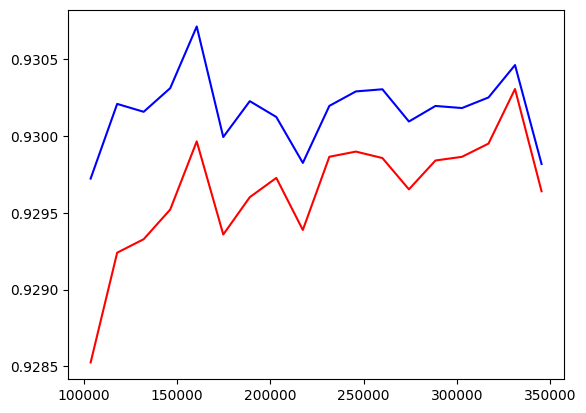

In [8]:
# learning curve for Gradient Boost
from sklearn.model_selection import learning_curve

N, train_lc, val_lc = learning_curve(gbr_model, X, y, cv=5,
                                         train_sizes=np.linspace(0.3, 1, 18))
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')


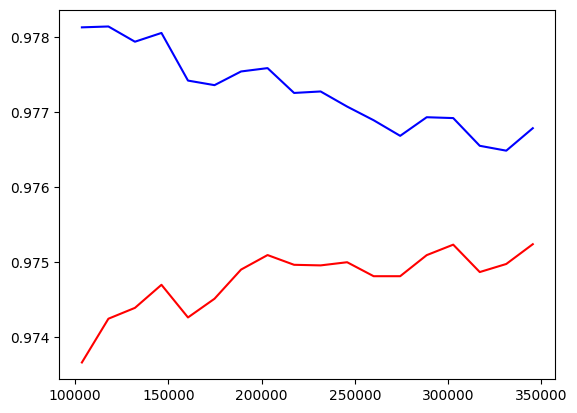

In [9]:
# learning curve for XGBoost
from sklearn.model_selection import learning_curve

N, train_lc, val_lc = learning_curve(xgb_model, X, y, cv=5,
                                         train_sizes=np.linspace(0.3, 1, 18))
plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
